<a href="https://colab.research.google.com/github/akrocq/Machine-Learning-Spotify-Popularity/blob/main/MSCI_446_Final_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team Members #
* Sara Hosseini (20715257)
*   Carter Ibach (20903582)
*   André Larocque (20880058)
* Fraser Morisson (20884102)
* Yi Nan Zhang (20897983)




# Introduction #

###Motivation###
In the music industry, having a strong fanbase is a great support to the success of an artist. An artist's goal is to create music that people enjoy listening to and to grow their audience. It is very difficult for artists to determine what songs should be marketed when creating several new songs, and resources are put into advertising and producing videos for songs before it is known which will be popular with audiences. Listeners are crucial for an artists' longevity in the industry as without them, artists have no influence or popularity - their music becomes outdated and forgotten. So identifying which features of their songs attract the most popularity from their listeners is important in determining what  features to focus on with future releases and which to avoid. This report aims first and foremost to predict which of artists songs will be more popular given the sound of the songs. This also aims to help artists to identify what their audience responds best to in terms of song features (ex. danceability, tempo, acoustic) so artists can plan accordingly when creating new songs.

###Business Problem###
The problems being solved are that artists often do not know what songs should be marketed or what audio features should be prioritized when creating new songs. The models created should help artists identify which songs will be more popular compared to their other songs, as well as audio features to be prioritized so they can create new songs that will be popular amongst the artists' audience. These will both use previous data from these artists with popularity metrics used from Spotify. All models will follow the same structure, but will be uniquely trained for individual artists as metrics and what makes songs popular will vary from artist to artist.


# Data Description #

### Intro to Dataset ###

The dataset used for this machine learning problem consists of audio features of songs for several artists. These audio features convey information about songs such as tempo, danceability, key, and loudness. Most importantly, it is also possible to obtain a value for the popularity of individual songs, where higher numbers indicate that a song is more popular. Data for 100 different artists is used, with most artists having around 50 songs included in the dataset.

Table 1: Description of all audio features

Feature | Data Type | Meaning
----|----|----
Explicit | Boolean | If the song has explicit language
Danceability | Numeric [0,1]| “Danceability describes how suitable a track is for dancing based on a combination of musical elements”
Energy | Numeric [0,1] | “Represents a perceptual measure of intensity and activity”
Key | Categorical | The key signature of the song (C, D, etc.)
Loudness | Numeric [0,1]* | “Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks.”
Mode | Boolean | The modality of a track: (1 - major key, 0 - minor key)
Speechiness | Numeric [0,1] | “Speechiness detects the presence of spoken words in a track.”
Acousticness | Numeric [0,1] | “A confidence measure from 0.0 to 1.0 of whether the track is acoustic.”
Instrumentalness | Numeric [0,1] | “Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.”
Liveness | Numeric [0,1] | “Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.”
Valence | Numeric [0,1] | “Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).”
Tempo | Numeric [0,1]* | The ratio of the track’s tempo (beats per minute) divided by the highest tempo in the “this is” playlist for each artist.
Duration | Numeric [0,1]* | The ratio of the track’s duration in milliseconds divided by the longest duration in the “this is” playlist for each artist.
Time Signature | Categorical | The amount of beats in one measure (a.k.a. bar) of the track.

**These values were normalized as their initial range is not [0,1]*

All meanings described in quotation marks are cited from the [Spotify for Developers documentation](https://developer.spotify.com/documentation/web-api/reference/#/).


#### Obtaining the Data ####

Spotify is a music streaming platform with a huge presence in the industry with a public API that can be leveraged to obtain data about millions of songs. Necessary data about songs popularity and audio features was collected from Spotify’s song database using their [built in API](https://developer.spotify.com/documentation/web-api/reference/#/). Using their pre-existing generated “This is Artist Name” playlists, it was easy to find playlists of approximately 50 songs for all desired artists, and the IDs for these playlists are obtained from the urls of the playlists when using spotify in a browser. With the playlists’ IDs obtained, two request calls were used to get the necessary information about every song on the playlists as shown in Table 2 below.

Table 2: Spotify web API requests to pull data

Request  | Input | Output
-------------------|------------------|----
Get Playlist Items | “This is [Artist]” playlist_ids | tracks' ids, tracks’ popularities, tracks’ names
Get Tracks' Audio Features| tracks' ids *(fetched from the previous request)* |all audio features for each track

This is received as a .JSON file where the data is easily extracted into a .CSV for each artist to allow training and testing of the machine learning model.

### Getting Started ###

For the model, a dataset of artist's songs is needed that has been uploaded to Google Drive. Follow the instructions to ensure that all files are present for the model to run smoothly.

1. Download this [zip file](https://drive.google.com/file/d/19-CGkhT3x_Q3Z2ENG8OrGdElJOM7orUZ/view?usp=sharing) onto your local machine
2. Unzip the file and store it in a location of your choice
3. In the section below, click on ```Choose Files``` and select all the files in the folder. Note that selecting the folder will not upload the files, so please select all individual files.
4. Once the files have been uploaded, the code in this report can be executed.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io

uploaded_files = files.upload() # upload file

Saving 5_Seconds_of_Summer.csv to 5_Seconds_of_Summer.csv
Saving Aerosmith.csv to Aerosmith.csv
Saving Alestorm.csv to Alestorm.csv
Saving Alicia_Keys.csv to Alicia_Keys.csv
Saving Amon_Amarth.csv to Amon_Amarth.csv
Saving Anthrax.csv to Anthrax.csv
Saving Ariana_Grande.csv to Ariana_Grande.csv
Saving Arrogant_Worms.csv to Arrogant_Worms.csv
Saving Artillery.csv to Artillery.csv
Saving Avril_Lavigne.csv to Avril_Lavigne.csv
Saving Backstreet_Boys.csv to Backstreet_Boys.csv
Saving Beyonce.csv to Beyonce.csv
Saving Big_Sean.csv to Big_Sean.csv
Saving Billie_Eilish.csv to Billie_Eilish.csv
Saving Black_Eyed_Peas.csv to Black_Eyed_Peas.csv
Saving Britney_Spears.csv to Britney_Spears.csv
Saving BTS.csv to BTS.csv
Saving Celine_Dion.csv to Celine_Dion.csv
Saving Charlie_Puth.csv to Charlie_Puth.csv
Saving Chris_Brown.csv to Chris_Brown.csv
Saving Christina_Aguilera.csv to Christina_Aguilera.csv
Saving Coldplay.csv to Coldplay.csv
Saving Daft_Punk.csv to Daft_Punk.csv
Saving Dalriada.csv to D

In [ ]:
# easy way to change file used. Taylor Swift is set as default for data summaries,
# but any file uploaded can be used from the provided data
FILENAME = 'Taylor_Swift.csv'

In [ ]:
def readFile(filename):
    return io.BytesIO(uploaded_files[filename])

raw_data = readFile(FILENAME)

### Data Visualizations ###
To summarize the data visually for each of the artists, the data is shown below to display the summarized statistics along with the visual display of the correlation between the different songs' features.

The summary statistic table shows the artists songs' count, mean, standard deviation, minimum, 25 percentile, 50 percentile, 75 percentile and maximum.

In [ ]:
# load as a data frame
data = pd.read_csv(raw_data)
# summary statistics of data
data.describe()

,Unnamed: 0,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,69.970000,0.603320,0.57463,4.840000,-7.774640,0.860000,0.069690,0.294632,0.005293,0.135079,0.411055,121.794420,235759.410000,3.960000
std,29.011492,7.577819,0.121278,0.17660,3.500996,2.657607,0.348735,0.069503,0.305135,0.048774,0.075791,0.211967,29.594369,56425.043027,0.345826
min,0.000000,52.000000,0.292000,0.15600,0.000000,-15.480000,0.000000,0.024300,0.000443,0.000000,0.057600,0.037400,68.534000,148781.000000,1.000000
25%,24.750000,65.000000,0.552000,0.44725,1.750000,-9.395000,1.000000,0.033650,0.050350,0.000000,0.090250,0.243500,96.013500,209120.000000,4.000000
50%,49.500000,70.000000,0.611500,0.59550,5.000000,-7.190000,1.000000,0.051500,0.167000,0.000011,0.110500,0.438000,119.234000,230587.000000,4.000000
75%,74.250000,75.000000,0.665250,0.71050,7.000000,-5.858500,1.000000,0.071900,0.537250,0.000104,0.142750,0.550250,144.508250,245483.500000,4.000000
max,99.000000,92.000000,0.897000,0.89800,11.000000,-2.098000,1.000000,0.519000,0.964000,0.488000,0.483000,0.943000,182.162000,613027.000000,5.000000


The heatmap shows the correlation between each feature against one another. Depending on the song and artist, two features coul potentially have a high correlation depending on whether the value stated on the heatmap is positive or negative. The more positive the correlation is, the better showcasing a high-correlation between the features. As the goal of the project is to determine whether a song will be popular, observe for each artist how each feature correlates with the popularity feature. For instance, with Ed Sheeran's data, there is a high correlation between the popularity and the energy of his songs. The higher the energy feature, the more likely Ed Sheeran's next song could be popular.

<Axes: >

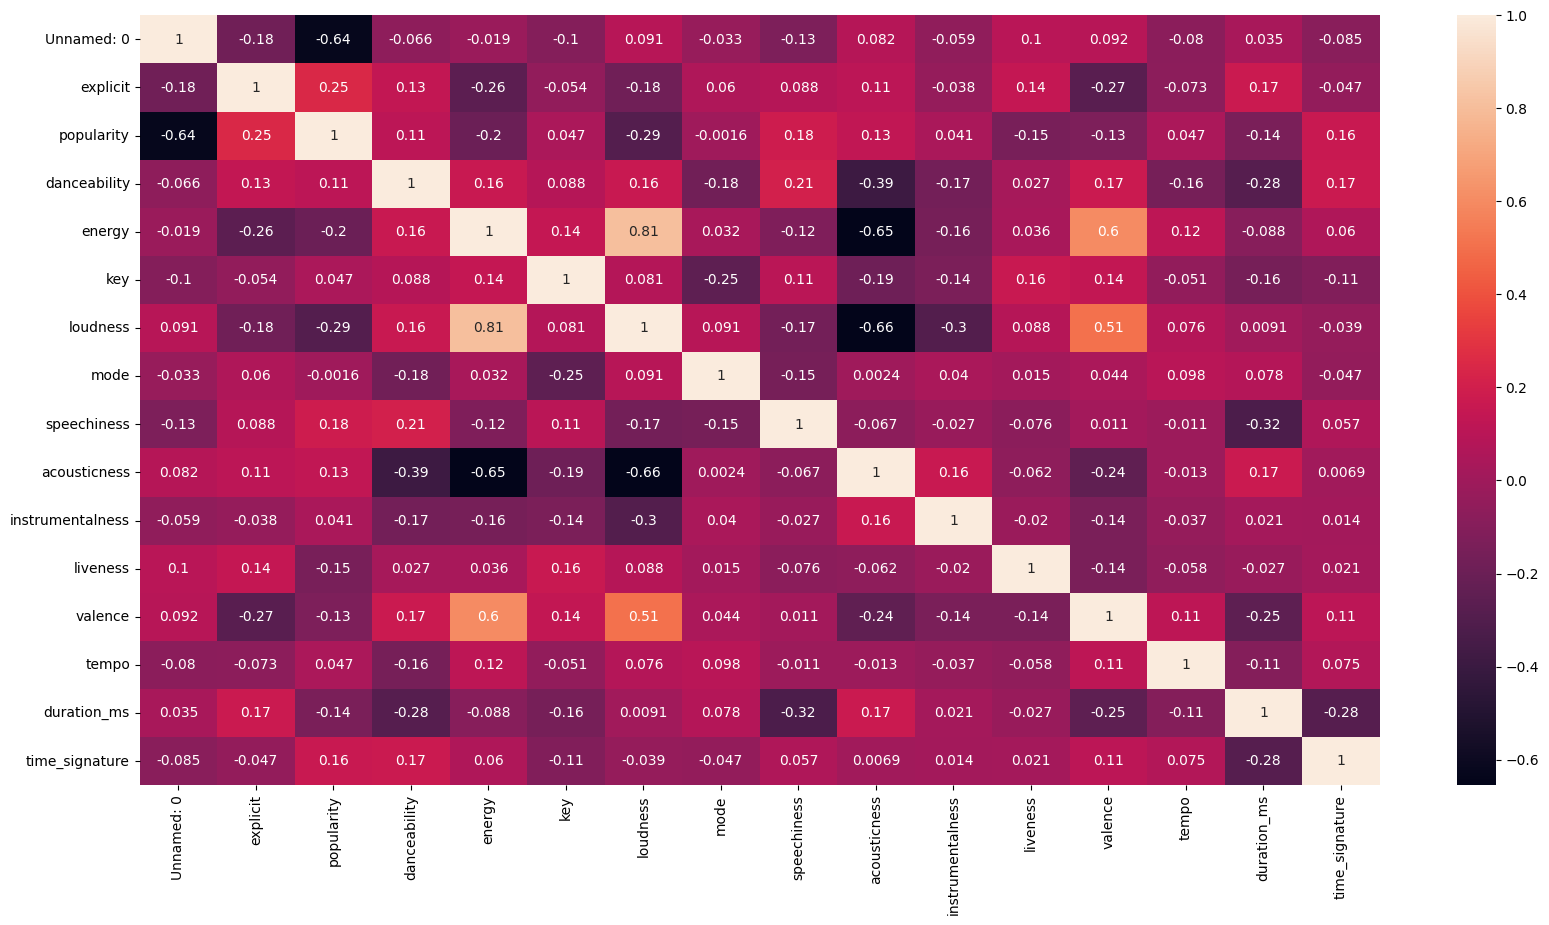

In [ ]:
# plot heatmap for song features
import plotly.graph_objects as go
plt.figure(figsize = (20, 10))
hmap = data.corr()
sns.heatmap(hmap, annot = True)

For the scatter plot below, each dot represents a song from the artist. Observe that for each song it shows the correlation between the song's popularity and the danceability. The higher the correlation, the dot will be located closer to the upper right hand of the graph. This shows that danceability can make a difference in the song's popularity with the rise of clubbing music and dance teams.

In [ ]:
# the correlation between dance and popularity
df = data.groupby('popularity')['danceability'].mean().sort_values(ascending=[False]).reset_index()
df.head()
import plotly.express as px
px.scatter(data, x = "popularity", y ="danceability", color="danceability",size='popularity').show()

The histograms below showcase the distribution of each feature. Notice that each artist's feature varies for every song, for instance singers who tend to sing acoustic are more likely to have lower energy compared to rappers. The distribution graphs are there to assist with comparing each singer's features compared to other artists.

<ipython-input-41-addbed4156bf>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-41-addbed4156bf>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-41-addbed4156bf>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

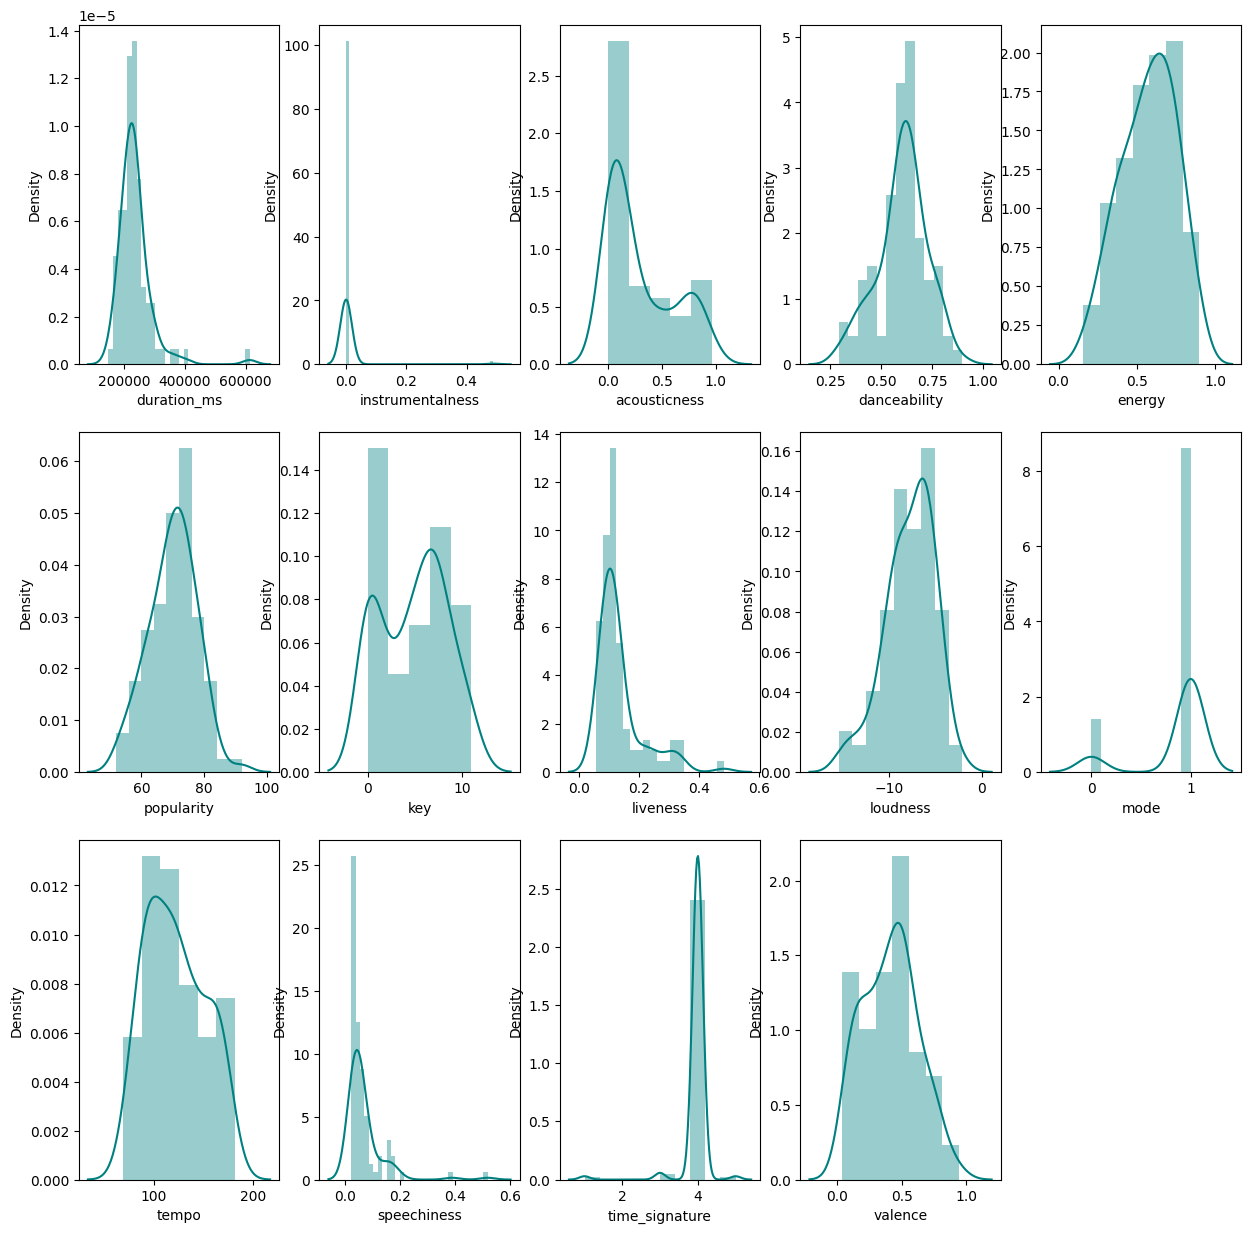

In [ ]:
# plot to show the relationship of each feature
figure, axes = plt.subplots(3, 5, figsize=(15, 15))
sns.distplot( data["popularity"] , color="teal", ax=axes[1, 0])
sns.distplot( data["danceability"] , color="teal", ax=axes[0, 3])
sns.distplot( data["energy"] , color="teal", ax=axes[0, 4])
sns.distplot( data["key"] , color="teal", ax=axes[1, 1])
sns.distplot( data["loudness"] , color="teal", ax=axes[1, 3])
sns.distplot( data["mode"] , color="teal", ax=axes[1, 4])
sns.distplot( data["speechiness"] , color="teal", ax=axes[2, 1])
sns.distplot( data["acousticness"] , color="teal", ax=axes[0, 2])
sns.distplot( data["instrumentalness"] , color="teal", ax=axes[0, 1])
sns.distplot( data["liveness"] , color="teal", ax=axes[1, 2])
sns.distplot( data["valence"] , color="teal", ax=axes[2, 3])
sns.distplot( data["tempo"] , color="teal", ax=axes[2, 0])
sns.distplot( data["duration_ms"] , color="teal", ax=axes[0, 0])
sns.distplot( data["time_signature"] , color="teal", ax=axes[2, 2])
figure.delaxes(axes[2][4])
plt.show()

#### Data Cleaning ####
The data received from spotify was very clean, and no null or mislabeled values were found. If some values were mislabeled, it is very difficult to find them as they are numeric labels measuring something through an algorithm unreleased publicly, so it is impossible to be 100% certain there is no mislabeled data. All data was assumed to be clean, so no data cleaning was performed. No evidence was found that this affected the final model.

#### Data Transformation ####

A few key steps were required to transform the data before it could be used to train the model. First one-hot encoding was used on the song key to get 12 binary variables.

As not all artists have songs in all 12 different keys, if any keys were missing from the one-hot encoding, columns of 0s were added to fill in the missing gaps. Once all 12 columns were confirmed to exist, they are ordered numerically and given names according to the musical key they represent.

The same process for key signature was applied to mode, which describes whether the song is in a major or minor key, for the same reasoning.

In [ ]:
# Data Transformation (one-hot encoding)
def convertKeys(data: pd.DataFrame) -> pd.DataFrame:
    """Convert key number to binary columns for associated keys according to Spotify API documentation"""
    key_dummies = pd.get_dummies(data['key'])
    # if any keys are missing, add column of zeroes
    for i in range(12):
        if (i) not in list(key_dummies.columns.values):
            key_dummies[i] = 0
    # order columns and set names
    key_dummies = key_dummies[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
    key_dummies.columns = ['C', 'C#/Db', 'D', 'D#/Eb', 'E', 'F', 'F#/Gb',
                        'G', 'G#/Ab', 'A', 'A#/Bb', 'B']
    return data.drop('key', axis=1).join(key_dummies)

def convertModes(data: pd.DataFrame) -> pd.DataFrame:
    """Convert mode to binarry columns"""
    mode_dummies = pd.get_dummies(data['mode'])
    # if any mode is missing, add column of zeroes
    for i in range(2):
        if (i) not in list(mode_dummies.columns.values):
            mode_dummies[i] = 0
    # order columns and set names
    mode_dummies = mode_dummies[[0, 1]]
    mode_dummies.columns = ['minor', 'major']
    return data.drop('mode', axis=1).join(mode_dummies)

After the key encoding was completed, unnecessary columns were dropped and the new columns were added into the database. key, mode, id, and name were all dropped as key and mode are replaced by the new columns and id/name are identifiers that should not be used by the model. Following this, the 12 boolean columns for the keys and 2 boolean columns for mode were added to the dataframe.

Almost all songs are in 4/4 time, therefore songs with other time signatures do not have enough data to determine a correlation. For this reason, key signature was removed from the dataset.

Once only the necessary columns remained, the numeric columns were normalized as necessary to ensure the coefficients from regression can be compared. loudness, tempo, and duration_ms were all modified to have the maximum value be 1, with a possible minimum of 0. This was done to keep the same scale between values as adjusting them to make the actual minimum 0 would not preserve the same ratio between values in the columns. Popularity is the only numeric column with a popularity greater than 1 after this, as it is the class label and will not be compared to the other variables. As well, having a larger range or output values should allow more distinction between results which will help with clarity and analyzing models.

In [ ]:
def normalize_column(column: pd.Series) -> pd.Series:
    """Normalize a column of data"""
    return column.abs() / column.abs().max()

In [ ]:
def normalizeAll(data: pd.DataFrame) -> pd.DataFrame:
    """Normalize all numeric columns of data (does inplace and returns)"""
    for column in data.columns:
        if column in ['explicit', 'popularity', 'C', 'C#/Db', 'D', 'D#/Eb', 'E', 'F', 'F#/Gb', 'G', 'G#/Ab', 'A', 'A#/Bb', 'B', 'minor', 'major']:
            continue
        data[column] = normalize_column(data[column])
    return data

In [ ]:
# Prepare data using above functions
def preprocess(data: pd.DataFrame) -> pd.DataFrame:
    """Preprocess the data"""
    data = convertKeys(data)
    data = convertModes(data)
    data = data.drop(["id", "name", "time_signature"], axis=1)
    data = data.iloc[:, 1:] # drop unnamed index column
    data = normalizeAll(data)
    return data

# Loads a single playlist into memory based on filename
def loadPlaylist(filename: str):
    raw_data = readFile(filename)
    data = pd.read_csv(raw_data)
    names = data['name'] # extract names for later use
    refined_data = preprocess(data)

    x_multi = refined_data.drop('popularity', axis=1) # feature data
    y_target = refined_data['popularity'] # target data

    return (x_multi, y_target, names)

refined_data = preprocess(data)

Once the data has been prepared, the proper columns are remaining in the dataset, and all have a maximum value of 1 apart from popularity so they can be compared.

In [ ]:
# Available features
print([x for x in refined_data.columns.values])

['explicit', 'popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'C', 'C#/Db', 'D', 'D#/Eb', 'E', 'F', 'F#/Gb', 'G', 'G#/Ab', 'A', 'A#/Bb', 'B', 'minor', 'major']


In [ ]:
refined_data.describe()

,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,E,F,F#/Gb,G,G#/Ab,A,A#/Bb,B,minor,major
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.00000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000
mean,69.970000,0.672598,0.639900,0.502238,0.134277,0.305635,0.010846,0.279667,0.435901,0.668605,...,0.090000,0.100000,0.050000,0.21000,0.040000,0.08000,0.040000,0.050000,0.140000,0.860000
std,7.577819,0.135204,0.196659,0.171680,0.133917,0.316530,0.099947,0.156917,0.224779,0.162462,...,0.287623,0.301511,0.219043,0.40936,0.196946,0.27266,0.196946,0.219043,0.348735,0.348735
min,52.000000,0.325530,0.173719,0.135530,0.046821,0.000460,0.000000,0.119255,0.039661,0.376226,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,65.000000,0.615385,0.498051,0.378456,0.064836,0.052230,0.000000,0.186853,0.258218,0.527078,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000
50%,70.000000,0.681717,0.663140,0.464470,0.099229,0.173237,0.000022,0.228778,0.464475,0.654549,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000
75%,75.000000,0.741639,0.791203,0.606912,0.138536,0.557313,0.000214,0.295549,0.583510,0.793295,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000
max,92.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


# Machine Learning Model #
## Model Description

Linear regression model that outputs a coefficient for each audio feature for a given artist. Given a testing song, these coefficients multiply the normalized values for each audio feature to output the song's predicted popularity compared to the artist's other popular songs.


In [ ]:
from sklearn.linear_model import LinearRegression
# Create linear regression object
lreg = LinearRegression()

In [ ]:
x_multi = refined_data.drop('popularity', axis=1)
y_target = refined_data['popularity']

In [ ]:
def rankify(x: pd.Series) -> pd.Series:
    """Converts a series of values into a series of ranks"""
    return x.rank(method='min')

In [ ]:
from scipy.stats import kendalltau
# Kendall's tau is a measure of the correspondence between two rankings.

To avoid over fitting on the available training data, we validate our model with k fold cross-validation. The accuracy metric we employ is Kendall's tau-b/c, which is a metric used to measure the similarity between two sets of ranked items. This measurement indicates the similarity between the two lists we created. A score of 1 indicates perfect similarity, -1 indicates perfect inverse similarity, and 0 indicates no correlation.

In [ ]:
from sklearn.model_selection import KFold

def KFold_validation(x_multi, y_target, lreg, k=10):
    kf = KFold(n_splits=k)
    acc_score = []
    for train_index, test_index in kf.split(x_multi):
        x_train, x_test = x_multi.iloc[train_index], x_multi.iloc[test_index]
        y_train, y_test = y_target[train_index], y_target[test_index]

        lreg.fit(x_train, y_train)
        pred_values = lreg.predict(x_test)

        pred_ranks = rankify(pd.Series(pred_values))
        actual_ranks = rankify(y_test)

        acc = kendalltau(pred_ranks, actual_ranks)[0]
        acc_score.append(acc)

    avg_acc_score = np.mean(acc_score)

    return {"kfold_scores": acc_score, "average_kfold_score": avg_acc_score}

In [ ]:
# Train everything
def train_model(x_multi, y_target, names, lreg: LinearRegression):
    kfold_results = KFold_validation(x_multi, y_target, lreg)

    lreg.fit(x_multi, y_target)
    pred_values = pd.Series(lreg.predict(x_multi))

    pred_ranks = rankify(pred_values)
    actual_ranks = rankify(y_target)

    acc = kendalltau(pred_ranks, actual_ranks)[0]

    r2 = lreg.score(x_multi, y_target)
    intercept = lreg.intercept_

    coefficients = pd.Series(lreg.coef_ , index=x_multi.columns)
    coefficients.name = "coefficients"

    ranks = pd.concat({"name": names, "pred_rank": pred_ranks, "pred_pop": pred_values, "actual_pop": y_target, "actual_rank": actual_ranks}, axis=1)

    return {"accuracy": acc, "r2": r2, "intercept": intercept, "coefficients": coefficients, "sorted_coefficients": coefficients.sort_values(), "ranks": ranks, **kfold_results}

To run the the training function and the future tests on a selected playlist, a runner function is created below.

In [ ]:
from typing import Callable
def runLoadedPlaylist(loadedPlaylist: tuple[pd.DataFrame, pd.Series, pd.Series],  trainingFunction: Callable[[pd.DataFrame, pd.Series, pd.Series, LinearRegression], dict[str, any]]):
    return trainingFunction(*loadedPlaylist, LinearRegression())

# Feature Engineering #


## Data regularization:

### Valence and Mode
Valence and Mode both describe the concept of the general positive or negative feel of a song. Leaving both features in the model may lead to both variables' coefficients being lower than necessary given probable importance of this concept to audiences' reaction to a given song, and thus its popularity. Dropping neither feature, dropping the Valence column, and dropping both the Major and Minor columns (which together represent the Mode feature), were tested to determine which resulted in the highest accuracy.

### Tempo, Loudness, Energy, and Danceability
While tempo and loudness are independent concepts when analysing music, energy and danceability are both dependent on one or both of these features. This is true both intuitively, as well as according to Spotify's API descriptions. Therefore dropping one, two, or three of the set of loudness, energy, danceability, and/or tempo were tested (based on Spotify's described dependencies) to determine which combination of features resulted in the highest accuracies.


## Accuracy Testing

During our testing process, we utilized k = 10 kfold testing to evaluate the songs in an artist's playlist. For each of the songs tested, our model outputted the predicted popularity. These predicted popularities were then used to create a list of songs ranked by their relative popularity. We also created a second list of the same songs, indexed by their actual popularity.

To measure the accuracy of our model, we used Kendall tau-b/c correlation accuracy.

We used the accuracy on the relative rank of the songs as our evaluation metric, rather than the accuracy of the predicted popularity. This is because our model's goal is to release songs that are popular compared to the artist's other popular songs, not just generally popular songs on Spotify.

To determine the overall accuracy of the model, we averaged the Kendall tau-b/c accuracies across all k = 10 tests. We then used this average score as our accuracy measurement for the model on the artist's playlist.

To ensure that we covered the major genres, we tested our model using three artists: Drake for Rap, Taylor Swift for Pop, and Metallica for Rock. By conducting these tests and utilizing this evaluation process, we were able to accurately assess our model's performance on an artist's playlist.

In [ ]:
# Test the accuracy without any feature engineering beyond that of Data Transformation
def testAll(x_multi, y_target, names, regressor: LinearRegression):
    x_multi_changed = x_multi, axis=1
    return train_model(x_multi_changed, y_target, names, regressor)

# Test the accuracy with the valence feature removed
def testNoValence(x_multi, y_target, names, regressor: LinearRegression):
    x_multi_changed = x_multi.drop(["valence"], axis=1)
    return train_model(x_multi_changed, y_target, names, regressor)

# Test the accuracy with the mode feature removed (by removing the major and minor columns)
def testNoMode(x_multi, y_target, names, regressor: LinearRegression):
    x_multi_changed = x_multi.drop(["minor", "major"], axis=1)
    return train_model(x_multi_changed, y_target, names, regressor)

The following are the average accuracy results with experiments playing with valence and mode features.

Table 3: Accuracy results for functions experimented with valence and mode

Function | Average Accuracy | Valence | Mode |
----|----|----|----|
testAll|0.00494399|T|T|
testNoValence|0.059594549|F|T|
testNoMode|-0.011104987|T|F|


Following the results for valence and mode, experiments on song features can be tested for accuracy.


In [ ]:
# Test the accuracy with the loudness feature removed
def testNoLoudness(x_multi, y_target, names, regressor: LinearRegression):
    x_multi_changed = x_multi.drop(["valence", "loudness"], axis=1)
    return train_model(x_multi_changed, y_target, names, regressor)

# Test the accuracy with the energy feature removed
def testNoEnergy(x_multi, y_target, names, regressor: LinearRegression):
    x_multi_changed = x_multi.drop(["valence", "energy"], axis=1)
    return train_model(x_multi_changed, y_target, names, regressor)

# Test the accuracy with the tempo feature removed
def testNoTempo(x_multi, y_target, names, regressor: LinearRegression):
    x_multi_changed = x_multi.drop(["valence", "tempo"], axis=1)
    return train_model(x_multi_changed, y_target, names, regressor)

# Test the accuracy with the danceability feature removed
def testNoDanceability(x_multi, y_target, names, regressor: LinearRegression):
    x_multi_changed = x_multi.drop(["valence", "danceability"], axis=1)
    return train_model(x_multi_changed, y_target, names, regressor)

# Test the accuracy with the loudness and tempo features removed
def testNoLoudnessTempo(x_multi, y_target, names, regressor: LinearRegression):
    x_multi_changed = x_multi.drop(["valence", "loudness", "tempo"], axis=1)
    return train_model(x_multi_changed, y_target, names, regressor)

# Test the accuracy with the loudness and danceablity features removed
def testNoLoudnessDanceability(x_multi, y_target, names, regressor: LinearRegression):
    x_multi_changed = x_multi.drop(["valence", "loudness", "danceability"], axis=1)
    return train_model(x_multi_changed, y_target, names, regressor)

# Test the accuracy with the tempo and danceability features removed
def testNoTempoDanceability(x_multi, y_target, names, regressor: LinearRegression):
    x_multi_changed = x_multi.drop(["valence", "tempo", "danceability"], axis=1)
    return train_model(x_multi_changed, y_target, names, regressor)

# Test the accuracy with the tempo and energy features removed
def testNoTempoEnergy(x_multi, y_target, names, regressor: LinearRegression):
    x_multi_changed = x_multi.drop(["valence", "tempo", "energy"], axis=1)
    return train_model(x_multi_changed, y_target, names, regressor)

# Test the accuracy with the tempo, loudness, and danceability features removed
def testNoTempoLoudnessDanceability(x_multi, y_target, names, regressor: LinearRegression):
    x_multi_changed = x_multi.drop(["valence", "tempo", "loudness", "danceability"], axis=1)
    return train_model(x_multi_changed, y_target, names, regressor)

The above tests result in the following accuracies with combinations of energy, tempo, danceability, and loudness features removed.

Table 4: Accuracy results for functions with combinations of features removed

Function | Accuracy | Energy | Tempo | Danceability | Loudness |
----|----|----|----|----|----|
testNoLoudness|0.0174453705163058|T|T|T|F|
testNoEnergy|0.0492666946210145|F|T|T|T|
testNoTempo|0.0516318031298354|T|F|T|T|
testNoDanceability|0.0896221768558654|T|T|F|T|
testNoLoudnessTempo|0.03605423490455|T|F|T|F|
testNoLoudnessDanceability|0.0402091319586474|T|T|F|F|
testNoTempoDanceability|0.0684863155407289|T|F|F|T|
testNoTempoEnergy|0.0661777631761915|F|F|T|T|
testNoTempoLoudnessDanceability|0.0198163453580074|T|F|F|F|

It was determined that removing only danceability led to the best accuracy.

These tests also showed the removal of more features representing important musical concpets led to reduced accuracy. Therefore, in order not to reduce accuracy, no further features were dropped.


# Final Model #

To be able to run the final model training across all playlists, a function to load the playlists is created, as well as a function to run a training function across all of the loaded playlists.

In [ ]:
# Loads all uploaded playlists into memory
def loadAllPlaylists() -> dict[str, tuple[pd.DataFrame, pd.Series, pd.Series]]:
    """Loads all playlists in the Data directory"""
    results = {}
    for filename in uploaded_files.keys():
        if filename.endswith(".csv"):
            results[filename] = loadPlaylist(filename)
    return results

In [ ]:
def runAllLoadedPlaylists(loadedPlaylists: dict[str, tuple[pd.DataFrame, pd.Series, pd.Series]], trainingFunction: Callable[[pd.DataFrame, pd.Series, pd.Series, LinearRegression], dict[str, any]]):
    """Runs the given training function on all loaded playlists"""
    results = {}
    for filename, data in loadedPlaylists.items():
        results[filename] = trainingFunction(*data, LinearRegression())
    return results

As the results are in the form of a dictionary with the filename as the key and the results as the value, the format must be changed to be able to collate the results and compare them easily. The function below does just that.

In [ ]:
def combineResults(data: dict[str, dict[str, any]]) -> pd.DataFrame:
    """Summarizes the results of the training"""

    # average all of the coefficients from each playlist
    coefficients = pd.DataFrame([x["coefficients"].rename(name) for name, x in data.items()])
    average_coefficients = coefficients.mean(axis=0).sort_values(ascending=False)
    kfold_scores = pd.DataFrame([x["kfold_scores"] for x in data.values()], index=data.keys())
    average_kfold_scores = pd.DataFrame(kfold_scores.mean(axis=1), columns=["average_kfold_score"])
    r2 = pd.DataFrame([x["r2"] for x in data.values()], index=data.keys(), columns=["r2"])
    intercept = pd.DataFrame([x["intercept"] for x in data.values()], index=data.keys(), columns=["intercept"])

    return {
        "coefficients": coefficients,
        "average_coefficients": average_coefficients,
        "kfold_scores": kfold_scores,
        "average_kfold_scores": average_kfold_scores,
        "r2": r2,
        "intercept": intercept
    }

All of the uploaded playlists are loaded into memory here:

In [ ]:
LOADED_PLAYLISTS = loadAllPlaylists()

The final model is described by this function and it is run on all of the loaded playlists. The results of which are exported to three CSV files; Coefficients, Average Kfold Scores, and R^2 values.

In [ ]:
def finalModel(x_multi, y_target, names, regressor: LinearRegression):
    x_multi_changed = x_multi.drop(["valence", "danceability"], axis=1)
    return train_model(x_multi_changed, y_target, names, regressor)

# Load playlist for tests
test_playlist = loadPlaylist(FILENAME)

res = runAllLoadedPlaylists(LOADED_PLAYLISTS, finalModel)

combineResults(res)["coefficients"].to_csv("MLSpotifyCoefficients.csv")
combineResults(res)["average_kfold_scores"].to_csv("MLSpotifyKendallTau-B.csv")
combineResults(res)["r2"].to_csv("MLSpotifyr^2.csv")

# Results #

Below the histograms and descriptions of r<sup>2</sup> values are shown. This indicates that most are below 0.4, and none are past even 0.75.

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




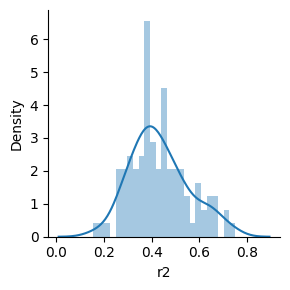

In [ ]:
data_r2 = pd.read_csv("MLSpotifyr^2.csv")
g = sns.FacetGrid(data_r2)
g.map(sns.distplot, "r2", bins = 25)
plt.show()

In [ ]:
data_r2.describe()

,r2
count,103.000000
mean,0.432677
std,0.121744
min,0.155868
25%,0.354910
50%,0.412666
75%,0.505174
max,0.748117


Below are a histogram and description of the Kendall Tau-B accuracies for all artists. Most accuracies are between -0.25 and 0.25, which is a very poor accuracy score.

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




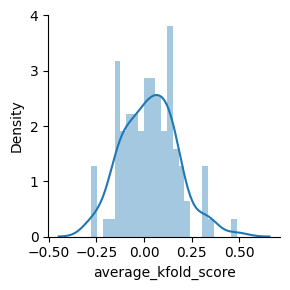

In [ ]:
data_k = pd.read_csv("MLSpotifyKendallTau-B.csv")
g = sns.FacetGrid(data_k)
g.map(sns.distplot, "average_kfold_score", bins = 25)
plt.show()

In [ ]:
data_k.describe()

,average_kfold_score
count,103.000000
mean,0.030122
std,0.144189
min,-0.276341
25%,-0.072340
50%,0.029253
75%,0.130432
max,0.487098


All coefficients for all models were also generated. Histograms were created to show distributions of these coefficients across all of the artists.

In [ ]:
data_co = pd.read_csv("MLSpotifyCoefficients.csv")
data_co.describe()

,explicit,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms,C,...,E,F,F#/Gb,G,G#/Ab,A,A#/Bb,B,minor,major
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,1.030000e+02,...,1.030000e+02,1.030000e+02,1.030000e+02,1.030000e+02,1.030000e+02,1.030000e+02,1.030000e+02,1.030000e+02,1.030000e+02,1.030000e+02
mean,0.513602,-0.857048,-1.974617,-1.632312,335.586885,-1.476987,-2.424054,-0.191692,0.385470,-1.871308e+11,...,-8.094639e+11,-1.871308e+11,-1.871308e+11,-1.871308e+11,-1.871308e+11,-1.871308e+11,-1.871308e+11,-1.871308e+11,5.048549e+13,5.048549e+13
std,6.390906,20.887007,19.389110,10.273352,3399.903395,11.147314,7.955026,11.548162,17.858269,9.542081e+12,...,7.616854e+12,9.542081e+12,9.542081e+12,9.542081e+12,9.542081e+12,9.542081e+12,9.542081e+12,9.542081e+12,3.818544e+14,3.818544e+14
min,-14.740262,-70.389562,-58.658763,-37.390576,-21.744389,-43.386959,-26.791580,-30.680881,-53.344912,-7.710978e+13,...,-7.710978e+13,-7.710978e+13,-7.710978e+13,-7.710978e+13,-7.710978e+13,-7.710978e+13,-7.710978e+13,-7.710978e+13,-5.080052e+00,-4.693769e+00
25%,-2.450592,-11.495244,-12.215718,-6.557830,-5.623267,-8.048585,-6.018920,-7.698415,-11.334354,-2.274058e+00,...,-4.130685e+00,-2.345459e+00,-3.076757e+00,-3.982787e+00,-3.183495e+00,-3.866258e+00,-4.516937e+00,-2.106560e+00,-9.978399e-01,-1.298052e+00
50%,0.000000,1.375262,-2.200905,-2.565865,0.560530,-1.165283,-2.114042,-1.337053,0.115845,4.801534e-01,...,-3.150548e-01,1.776357e-15,3.552714e-15,-1.270678e-01,2.218188e-01,-5.200479e-02,0.000000e+00,0.000000e+00,-8.588978e-02,1.106171e-01
75%,3.410919,10.719279,9.791748,4.945371,5.735768,5.787854,1.597868,6.516559,11.268057,4.134915e+00,...,2.075473e+00,3.281231e+00,2.634151e+00,3.191063e+00,2.845113e+00,2.518743e+00,4.825284e+00,3.107351e+00,1.489403e+00,1.105997e+00
max,31.546624,43.375693,43.046020,26.867674,34505.644766,27.344493,15.660052,28.093217,65.254908,5.783531e+13,...,1.770309e+01,5.783531e+13,5.783531e+13,5.783531e+13,5.783531e+13,5.783531e+13,5.783531e+13,5.783531e+13,3.498725e+15,3.498725e+15


<ipython-input-43-c9585e104bb0>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-43-c9585e104bb0>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-43-c9585e104bb0>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

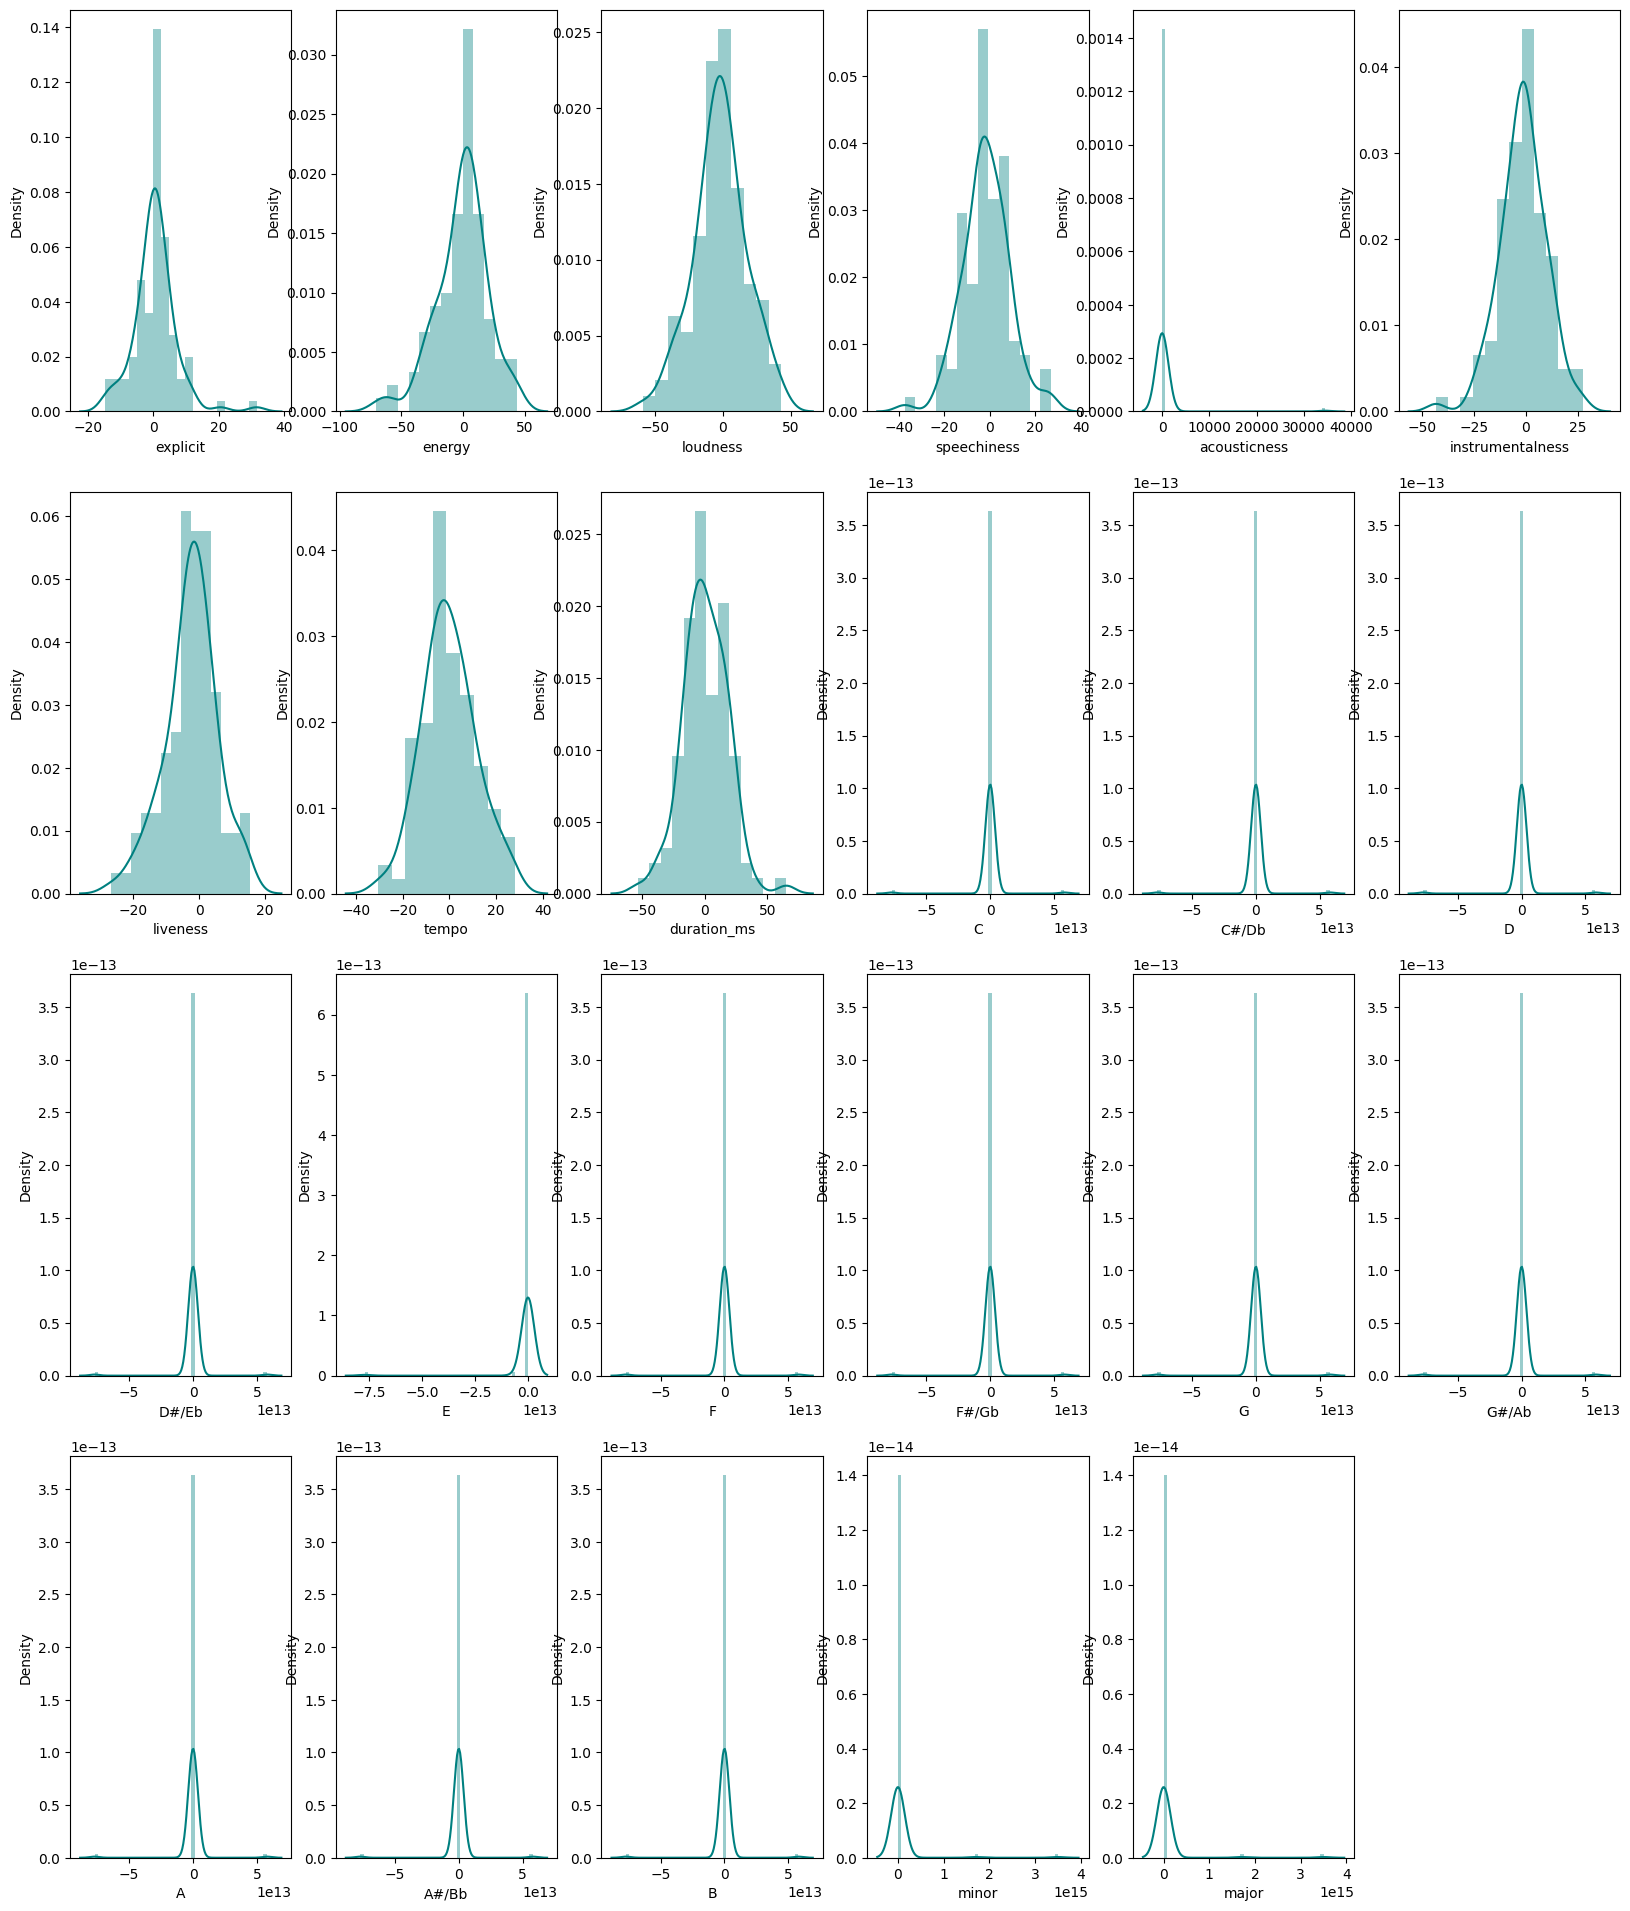

In [ ]:
figure, axes = plt.subplots(4, 6, figsize=(20, 24))
sns.distplot( data_co["explicit"] , color="teal", ax=axes[0, 0])
sns.distplot( data_co["energy"] , color="teal", ax=axes[0, 1])
sns.distplot( data_co["loudness"] , color="teal", ax=axes[0, 2])
sns.distplot( data_co["speechiness"] , color="teal", ax=axes[0, 3])
sns.distplot( data_co["acousticness"] , color="teal", ax=axes[0, 4])
sns.distplot( data_co["instrumentalness"] , color="teal", ax=axes[0, 5])
sns.distplot( data_co["liveness"] , color="teal", ax=axes[1, 0])
sns.distplot( data_co["tempo"] , color="teal", ax=axes[1, 1])
sns.distplot( data_co["duration_ms"] , color="teal", ax=axes[1, 2])
sns.distplot( data_co["C"] , color="teal", ax=axes[1, 3])
sns.distplot( data_co["C#/Db"] , color="teal", ax=axes[1, 4])
sns.distplot( data_co["D"] , color="teal", ax=axes[1, 5])
sns.distplot( data_co["D#/Eb"] , color="teal", ax=axes[2, 0])
sns.distplot( data_co["E"] , color="teal", ax=axes[2, 1])
sns.distplot( data_co["F"] , color="teal", ax=axes[2, 2])
sns.distplot( data_co["F#/Gb"] , color="teal", ax=axes[2, 3])
sns.distplot( data_co["G"] , color="teal", ax=axes[2, 4])
sns.distplot( data_co["G#/Ab"] , color="teal", ax=axes[2, 5])
sns.distplot( data_co["A"] , color="teal", ax=axes[3, 0])
sns.distplot( data_co["A#/Bb"] , color="teal", ax=axes[3, 1])
sns.distplot( data_co["B"] , color="teal", ax=axes[3, 2])
sns.distplot( data_co["minor"] , color="teal", ax=axes[3, 3])
sns.distplot( data_co["major"] , color="teal", ax=axes[3, 4])
figure.delaxes(axes[3][5])
plt.show()

### Discussion ###

This model provides very inaccurate results for all of the artists it was tested on, as the Kendell Tau-B accuracy never surpasses even 0.5, and the r<sup>2</sup> value is only above 0.7 for 3 of the artists. As the coefficients vary wildly between artists, even across artists with similar styles, a single model used to predict the popularity for songs from all of the artists would not be accurate. As well, popularity would likely be more dependent on artist than audio features, so the model would only identify what artist the songs are by and would not succeed in providing insights for the individual artists as was the goal of this project.

Valence and danceability both provided even less accurate results than their possible alternatives, so they were not included in the final model. As these are both dependent on other features, this indicates the measured independent features; such as tempo and mode (major or minor), are more valuable than the modified dependent features.

It should be noted that all results and the final set of features to use were generated by testing on 3 different artists from the dataset, and it is possible that testing on different artists would indicate different features that should be included in the final models, which may result in more accurate models. As well, an individual artist with more data may provide features that are more useful for that individual artist, which could then provide a more accurate model for that individual artist, rather than our set of features designed to be applicable to any artist.


### Notable Results ###

A few interesting observations can be made from the coefficients generated for all of the models.

First, acousticness has a very strange distribution where a few artists have extremely high coefficients that act as outliers and significantly raise the average. This stands out as it has the highest mean coefficient, but the median is only slightly higher than most.

Another interesting coefficient is energy. It has the widest distribution without any signfificant outliers, so it appears that energy has the largest impact on popularity on average for artists. The median is one of the highest indicating it is typically a positive correlation; however, some artists have large negative coefficients so it can have positive or negative influences depending on the artist.

One feature that was expected to be insignificant is loudness, as most individuals adjust volume when listening to music, so it should have no effect on popularity. Despite that it does not have smaller coefficients and seems to have a larger impact that other features such as speechiness or even tempo.

Surprisingly there are no keys that consistently seem to impact popularity. All of the coefficients average around 0 and have very little deviation. There are a few significant coefficients; however, these are likely for artists with no songs in these keys which can result in very different coefficients.

# Conclusions #

### Findings ###

The most important finding from this problem is that linear regression with audio features of songs does not provide accurate measures for predicting how popular a song will be for an individual artist. The models are not accurate enough to provide useful insights, and would be unreliable if used to decide what should be marketed.

The artist with the most accurate results by far is Artillery, a thrash metal band that has technically difficult and very fast songs. This is likely the most accurate as their most popular songs are very consistent in style, most artists have a few songs that became popular outside of their usual audience, but this never happened with Artillery, so there are common trends identified by the model in their most popular songs.

Apart from Artillery, some artists had decent r<sup>2</sup> scores, and others had ok Kendall’s Tau-B scores, but none had both and the scores were not sufficiently high to say the models were accurate for these artists.

The variation of the coefficients indicates how there is no consistency in what features lead to songs being popular across many artists, which makes sense as different genres would not represent the same songs as being popular and well received. As well, even within a genre, the coefficients varied which likely comes from the most popular songs from artists varying greatly even if the vast majority of songs are in a similar style. This indicates that artists should not follow trends of other similar artists, as this will still likely lead to songs that are not as successful for them.

A valuable takeaway is that considering more options for models and how to predict values can lead to better options and possibly a better accuracy within models. This project only used linear regression, when neural networks or convolutional neural networks may have produced more accurate results. If these types of machine learning models had been learned before this project, they would have been considered and likely used.

Moving forward, if a music artist wishes to estimate how popular an individual song will be, it would be better to use an analysis method that does not rely on numeric descriptions of audio features, or to use a model that accommodates for trends better than simple linear regression.


### Real World Applications ###

As the accuracy of the models created is low, the models are not very useful and should not be used to help artists estimate how popular their songs will be. Instead, artists should continue their current methods of identifying which of their songs will be marketed and have professional music videos produced, until a new better method is discovered.

Despite the models being inaccurate, the coefficients generated can still be useful. Artists can alter processes to use features that have higher coefficients, such as writing slightly faster songs or choosing the most popular key more often, if tempo and the key have high coefficients. They can also avoid highly negative coefficients such as avoiding certain keys or reducing the loudness or length of songs, if those had very negative coefficients for that artist.


### Possible Next Steps ###

Several next steps could be useful to create new similar yet better models for the same purpose. Some are different methods of creating the model itself, while some are more of how to modify the data so that any model created would likely be more accurate.

First, adding a new feature to the data to indicate if a song features another artist may improve the model. Many songs have other artists contributing, and this often contributes to popular songs reaching a wider audience, so this may be useful to identify what songs are more popular. This feature would be binary using 1 or 0 to indicate if another artist contributed or not.

Next, creating models with piecewise linear regression may also provide more accurate results. It is likely that songs do not consistently increase or decrease in popularity with tempo, but rather peak at some point, and it is not unreasonable to expect similar patterns for many other features. Using piecewise regression accounts for this basic trend and by adding more segments with different slopes could also help account for other trends where the importance of a feature varies for an artist's tracks, such as a range with similar popularities with significant drop-offs on either side.

Furthermore, neural networks may be the best way to create this model, as they account for much more complicated relationships between variables, and can identify if certain combinations of variables contribute more or less to popularity, unlike how regression just looks at one variable at a time. A neural network model would likely verify whether or not this data could be useful at all to predict the popularity of songs, as it can adjust itself to help make the accuracy as high as possible for each artist.

Another change that could be more useful for artists, is preparing the model based entirely on their own song data, and on more song data than just their 50 most popular songs. By experimenting and removing different features, this could create much more accurate models for individual artists, if they wished to use these insights to help write more popular songs and estimate popularity of their own new songs.


### Suprising Lessons ###

The most interesting lesson about machine learning from this project is that when data is poorly suited to creating a model, such as several artists and their song data in this case, the resulting model can be incredibly inaccurate and completely useless. It was expected that there would effectively be a minimum bar artists would reach, but most had horrible accuracies showing that the model was effectively useless. The importance of r<sup>2</sup> values and causation in the data was severely underestimated, so moving forward this would be considered much more when planning a project and creating models.

### Closing Statements ###

Despite the failure of individual models, this project was still valuable to understanding how catastrophically machine learning can fail when the data will not fit the model well. The next steps may help make more accurate models, but these models may also fail just as much if the data is not useful data to predict song popularity with.

The coefficients may provide useful information for individual artists, but there will always be outliers as there is much that contributes to popularity which is not encapsulated in this data. Still, artists could consider what trends are in their most popular songs and see if following those trends for their own music leads to continued success.

# Bibliography #


1.   OpenAI, personnel communication, Chat GPT; Accessed March 28th, 2023 https://chat.openai.com/
2. Owen Davie on 07/29/2021 in Music Business | Permalink | Comments (0), W. the B. (2021, August 5). Why fan engagement is so important to artist's teams. Hypebot. Retrieved April 4, 2023, from https://www.hypebot.com/hypebot/2021/07/why-fan-engagement-is-so-important-to-artists-teams.html
3.   Spotify, “Web API | Spotify for Developers”, Spotify for Developers; Accessed March 19th, 2023 https://developer.spotify.com/documentation/web-api
4.   Statistics Solutions, “Kendall's Tau and Spearman’s Rank Correlation Coefficient”, Complete Dissertation by Statistics Solutions; Accessed March 28th, 2023 https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/kendalls-tau-and-spearmans-rank-correlation-coefficient/#:~:text=Kendall's%20Tau%3A%20usually%20smaller%20values,accurate%20with%20smaller%20sample%20sizes.



